# Introduction

This project aims to predict the stock price of **Vanguard S&P 500 ETF (VFV.TO)** using **Long Short-Term Memory (LSTM)** neural networks. The goal is to analyze stock price trends and make informed forecasts based on historical data.

**Key Metrics: Mean Squared Error (MSE)**

To evaluate the model’s performance, we use **Mean Squared Error (MSE)**, which measures the average squared difference between actual and predicted stock prices.

- **Lower MSE values** indicate better model accuracy.
- MSE is useful for tracking how well the model generalizes to unseen data.

**Features Used for Prediction:**
The dataset contains **historical stock price data**, which includes:

- **Close Price**: The adjusted closing price of VFV.TO.
- **Time Series Sequences**: The model learns patterns using the last 60 days of stock prices to predict the next day’s closing price.

**How This Project Works:**

1. **Preprocessing the Data:**
   * Normalize stock prices using **MinMax Scaling**.
   * Create sequential input features for the LSTM model.
     
2. **Model Training:**
   * Train a **Long Short-Term Memory (LSTM) network** on historical stock data.
   * Use **dropout layers** to prevent overfitting.

3. **Performance Evaluation:**
   * Measure accuracy using **Mean Squared Error (MSE)**.
   * Compare predicted vs. actual stock prices visually.

4. **Future Price Prediction:**
   * Predict **the next day’s stock price** based on recent trends.
   * Convert predicted price to **USD**.

### Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

### Dataset

In [6]:
ticker = 'VFV.TO'
df = yf.download(ticker, start = '2015-01-01', end = '2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(df[['Close']])

In [8]:
seq_length = 60  # use last 60 days to predict next day
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [9]:
X, y = create_sequences(df_scaled, seq_length)
X_train, X_test = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8):]
y_train, y_test = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]

Note : I use 80% of the data as training data and 20% of the data for testing data

### LSTM Model

In [12]:
model = Sequential([
    keras.Input(shape = (seq_length, 1)),  # Explicit Input layer
    LSTM(50, return_sequences = True),
    Dropout(0.2),
    LSTM(50, return_sequences = False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train The Model

In [15]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0285 - val_loss: 0.0059
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014 - val_loss: 7.1902e-04
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0010 - val_loss: 9.4444e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 6.4301e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011 - val_loss: 6.4963e-04
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.4660e-04 - val_loss: 5.9854e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.1497e-04 - val_loss: 0.0021
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━

### Prediction Visualization

In [17]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


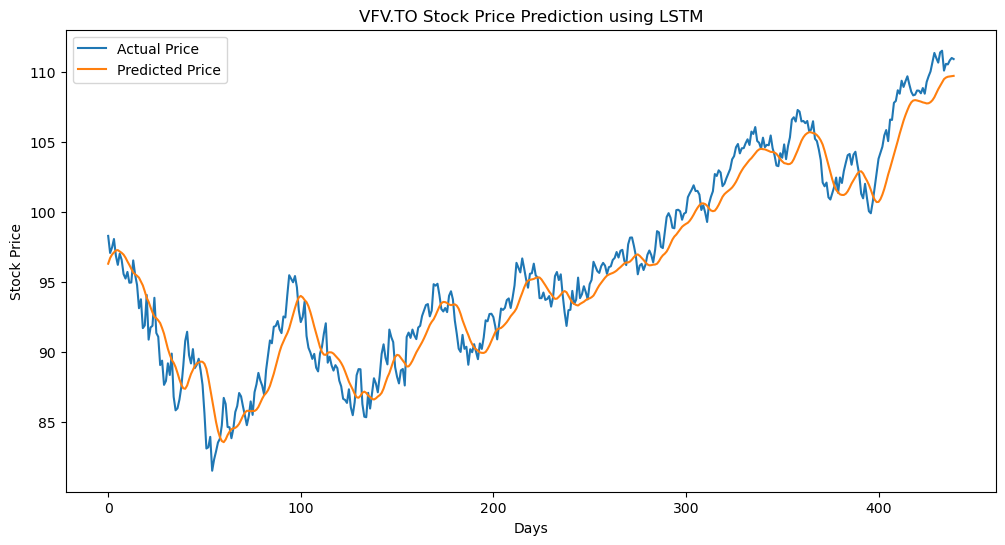

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label = 'Actual Price')
plt.plot(y_pred_rescaled, label = 'Predicted Price')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.show()

### Predict Next Day VFV.TO Closed Stock Price

In [20]:
last_60_days = df_scaled[-60:]  # get the last 60 days of closing prices
last_60_days = last_60_days.reshape(1, 60, 1)  # reshape for LSTM input

Note : Prediction made based last 60 days

In [22]:
predicted_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted stock price for the next day: {predicted_price[0][0]:.2f} USD")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted stock price for the next day: 109.74 USD
